In [18]:
import numpy as np
import util
import NN

import matplotlib.pyplot as plt

In [19]:
EPOCHS = 1000

x, y = util.generate_linear(100)
layers = [
    NN.FC_layer(2, 32, True),
    NN.relu(),
    NN.FC_layer(32, 32, True),
    NN.relu(),
    NN.FC_layer(32, 1, True),
    NN.sigmoid()
]
DNN = NN.myNN(layers)
loss = NN.MSE()

#opti = NN.optimizer('SGD', 0.01)
#opti = NN.optimizer('momentum', 0.01, {'beta' : 0.9})
#opti = NN.optimizer('adagrad', 0.01, {'epsilon' : 1e-8})
opti = NN.optimizer('adam', 0.01, {'epsilon':1e-8, 'beta1':0.9, 'beta2':0.999})
losses = []

for epoch in range(1, EPOCHS+1):
    y_pred = DNN.forward(x)
    loss_value = loss.forward(y, y_pred)
    losses.append(loss_value)

    dy = loss.backward(y, y_pred)
    DNN.backward(dy, opti)
    
    if epoch % 20 == 0:
        accuracy = util.accuracy(y, y_pred)
        print(f'epoch: {epoch}, loss: {loss_value}, accuracy: {accuracy}')


epoch: 20, loss: 0.04180133708566193, accuracy: 0.96
epoch: 40, loss: 0.02390463413412079, accuracy: 0.97
epoch: 60, loss: 0.018892609959158847, accuracy: 0.98
epoch: 80, loss: 0.016418800974814317, accuracy: 0.99
epoch: 100, loss: 0.014646943081114536, accuracy: 1.0
epoch: 120, loss: 0.013349960631014545, accuracy: 1.0
epoch: 140, loss: 0.012321530238877889, accuracy: 1.0
epoch: 160, loss: 0.01142990451900827, accuracy: 1.0
epoch: 180, loss: 0.010643389553832174, accuracy: 1.0
epoch: 200, loss: 0.009927518848838275, accuracy: 1.0
epoch: 220, loss: 0.0092747555804462, accuracy: 1.0
epoch: 240, loss: 0.008662508271896378, accuracy: 1.0
epoch: 260, loss: 0.008092438304194675, accuracy: 1.0
epoch: 280, loss: 0.007561973749323285, accuracy: 1.0
epoch: 300, loss: 0.00707136528414311, accuracy: 1.0
epoch: 320, loss: 0.006599561349104121, accuracy: 1.0
epoch: 340, loss: 0.006169892115787886, accuracy: 1.0
epoch: 360, loss: 0.005757244772522406, accuracy: 1.0
epoch: 380, loss: 0.00537612176107

[[1.12737901e-15]
 [1.00000000e+00]
 [1.18126288e-01]
 [2.64230629e-06]
 [1.00000000e+00]
 [9.98557290e-09]
 [1.00000000e+00]
 [1.18667626e-10]
 [3.18632311e-14]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.77401927e-07]
 [1.74788986e-04]
 [2.02981210e-07]
 [5.13617528e-04]
 [9.99999935e-01]
 [4.34532942e-07]
 [6.69993849e-06]
 [3.38988345e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.41828213e-06]
 [1.23679242e-07]
 [6.20139423e-10]
 [7.38903395e-03]
 [1.13996405e-08]
 [1.79210913e-12]
 [2.15965313e-13]
 [1.00000000e+00]
 [1.88035264e-02]
 [1.68868026e-09]
 [1.25539102e-11]
 [2.75401300e-02]
 [1.00000000e+00]
 [4.20360145e-04]
 [1.00000000e+00]
 [9.99999999e-01]
 [9.99999513e-01]
 [9.83820745e-12]
 [1.00000000e+00]
 [3.85376537e-05]
 [1.28444262e-07]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.90104508e-08]
 [1.00000000e+00]
 [8.33521386e-09]
 [1.00000000e+00]
 [9.43875545e-08]
 [1.56186762e-07]
 [1.50478477e-14]
 [9.21884001e-01]
 [6.39097171e-06]
 [1.32002864e-08]
 [1.000000

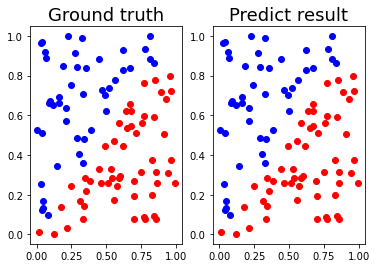

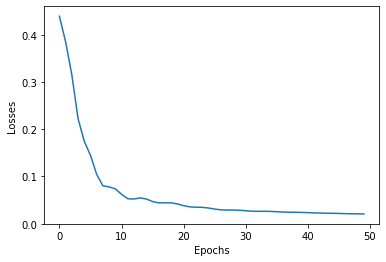

In [20]:
print(y_pred)
y_pred = np.around(y_pred)
util.show_result(x, y, y_pred)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.plot(losses[0:50])
plt.show()